In [1]:
# API 키를 환경변수로 관리하기 위한 설정 파일
from dotenv import load_dotenv

# API 키 정보 로드
load_dotenv()

True

In [5]:
from typing import Annotated, TypedDict
from langgraph.graph.message import add_messages


# State 정의
class State(TypedDict):
    # list 타입에 add_messages 적용(list 에 message 추가)
    messages: Annotated[list, add_messages]

In [ ]:
# !pip install langchain-ollama

  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.50
    Uninstalling langchain-core-0.3.50:
      Successfully uninstalled langchain-core-0.3.50



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# from langchain_openai import ChatOpenAI
from langchain_community.chat_models import ChatOllama
# from langchain_ollama import ChatOllama

# LLM 초기화
# llm = ChatOpenAI(api_key="ollama", model="mistral:latest", base_url="http://61.108.166.16:11434")
# llm = ChatOpenAI(model="gpt-4o-mini")
# llm = ChatOllama(model="mistral:latest", base_url="http://61.108.166.16:11434")
llm = ChatOllama(model="mistral:latest")
# llm = ChatOllama(model="mistral:latest", base_url="http://ollama_dev:11434")


In [26]:
question = "서울의 유명한 맛집 TOP 10 추천해줘"
llm.invoke(question)

ConnectionError: HTTPConnectionPool(host='61.108.166.16', port=11434): Max retries exceeded with url: /api/chat (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000002464C5AD0C0>: Failed to establish a new connection: [WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다'))

In [17]:
# 챗봇 함수 정의
def chatbot(state: State):
    # 메시지 호출 및 반환
    return {"messages": [llm.invoke(state["messages"])]}

In [18]:
# 그래프 생성 및 노드를 추가
from langgraph.graph import StateGraph, START, END

# 상태 그래프 초기화
graph_builder = StateGraph(State)

# 노드 추가
graph_builder.add_node("chatbot", chatbot)

In [19]:
# 시작 노드에서 챗봇 노드로의 엣지 추가
graph_builder.add_edge(START, "chatbot")
# 그래프에 엣지 추가
graph_builder.add_edge("chatbot", END)

In [20]:
# 그래프 컴파일
graph = graph_builder.compile()

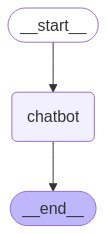

In [21]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [22]:
question = "서울의 유명한 맛집 TOP 10 추천해줘"

# 그래프 이벤트 스트리밍
for event in graph.stream({"messages": [("user", question)]}):
    # 이벤트 값 출력
    for value in event.values():
        print("Assistant:", value["messages"][-1].content)

ConnectError: [WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다